In [ ]:
# "Hesse" field
# https://github.com/antyeates1983/flhtools

import numpy as np

def Bx(x, y, z):
    return x*0 - 2

def By(x, y, z, t=2):
    return -z - t*(1 - z**2)/(1 + z**2/25)**2/(1 + x**2/25)

def Bz(x, y, z):
    return y

nx = 128
ny = 64
nz = 32
x1 = np.linspace(-20, 20, nx)
y1 = np.linspace(-20, 20, ny)
z1 = np.linspace(  0, 40, nz)
x, y, z = np.meshgrid(x1, y1, z1, indexing='ij')

bx = Bx(x, y, z)
by = By(x, y, z)
bz = Bz(x, y, z)

b = np.stack([bx, by, bz], axis=-1)
b.shape

(128, 64, 32, 3)

In [ ]:
x_seed = np.linspace(20, 100, 10)
y_seed = np.linspace(10, 50, 5)
seeds = np.array([[x, y, 0] for x in x_seed for y in y_seed])
seeds.shape

(50, 3)

In [ ]:
from magplot import CartesianPlotter

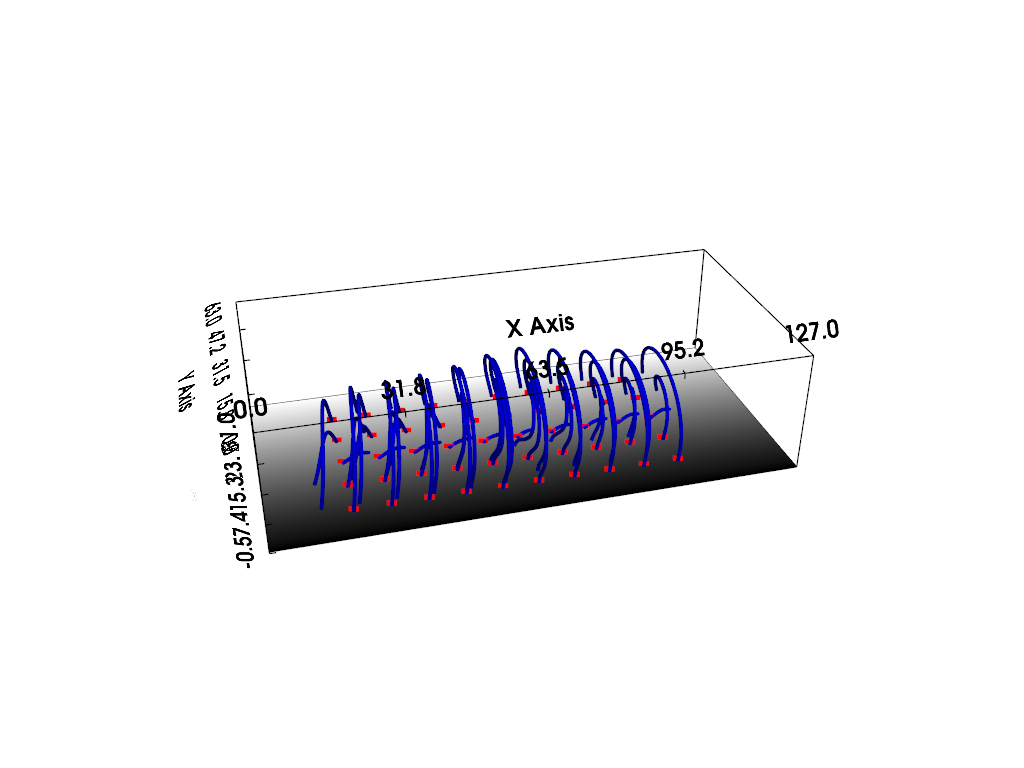

In [ ]:
plotter = CartesianPlotter()
plotter.define_vector_field(b)
plotter.show_bounds()
plotter.plot_outline(color='black')
plotter.plot_boundary(show_scalar_bar=False)
plotter.plot_field_lines(seeds, color='blue', radius=0.5,
                         seeds_config=dict(show_seeds=True, color='red', point_size=10))
plotter.camera.azimuth = 210
plotter.camera.elevation = -5
plotter.camera.zoom(0.8)
plotter.show(jupyter_backend='static')

In [ ]:
x_seed = np.linspace(-10, 10, 10)
y_seed = np.linspace(-10, 10, 5)
seeds = np.array([[x, y, 0] for x in x_seed for y in y_seed])
seeds.shape

(50, 3)

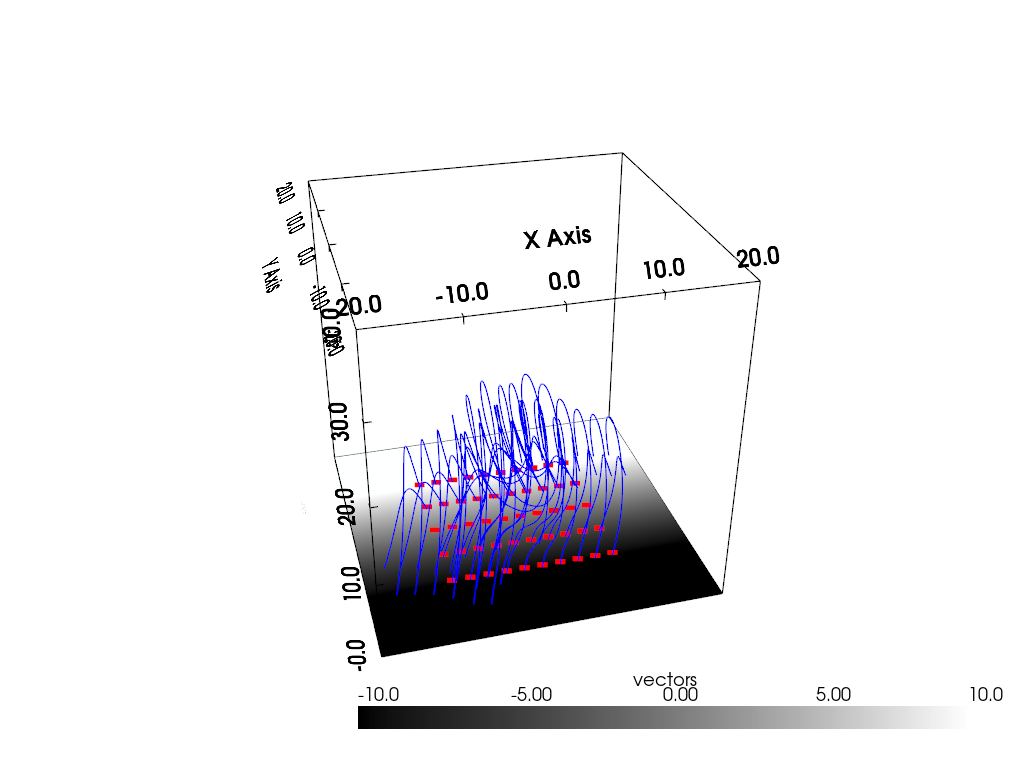

In [ ]:
plotter = CartesianPlotter()
plotter.define_vector_field(b, grid_coords=(x1, y1, z1))
plotter.show_bounds()
plotter.plot_outline(color='black')
plotter.plot_boundary(show_scalar_bar=True, clim=(-10, 10))
plotter.plot_field_lines(seeds, color='blue', render_lines_as_tubes=False,
                         seeds_config=dict(show_seeds=True, color='red', point_size=10))
plotter.camera.azimuth = 210
plotter.camera.elevation = -5
plotter.camera.zoom(0.8)
plotter.show(jupyter_backend='static')

In [ ]:
!wget "https://hinode.isee.nagoya-u.ac.jp/nlfff_database/v12/11890/20131106/11890_20131106_003600.nc"

In [ ]:
import netCDF4

In [ ]:
nc = netCDF4.Dataset('11890_20131106_003600.nc', 'r')
x1 = np.array(nc.variables['x'][:])
y1 = np.array(nc.variables['y'][:])
z1 = np.array(nc.variables['z'][:])
bx = np.array(nc.variables['Bx'][:].transpose(2,1,0))
by = np.array(nc.variables['By'][:].transpose(2,1,0))
bz = np.array(nc.variables['Bz'][:].transpose(2,1,0))
nc.close()

print(x1.shape, y1.shape, z1.shape)
print(bx.shape, by.shape, bz.shape)

(513,) (257,) (257,)
(513, 257, 257) (513, 257, 257) (513, 257, 257)


In [ ]:
b = np.stack([bx, by, bz], axis=-1)
b.shape

(513, 257, 257, 3)

In [ ]:
x_seed = np.linspace(100, 400, 10)
y_seed = np.linspace(50, 200, 10)
seeds = np.array([[x, y, 0] for x in x_seed for y in y_seed])
seeds.shape

(100, 3)

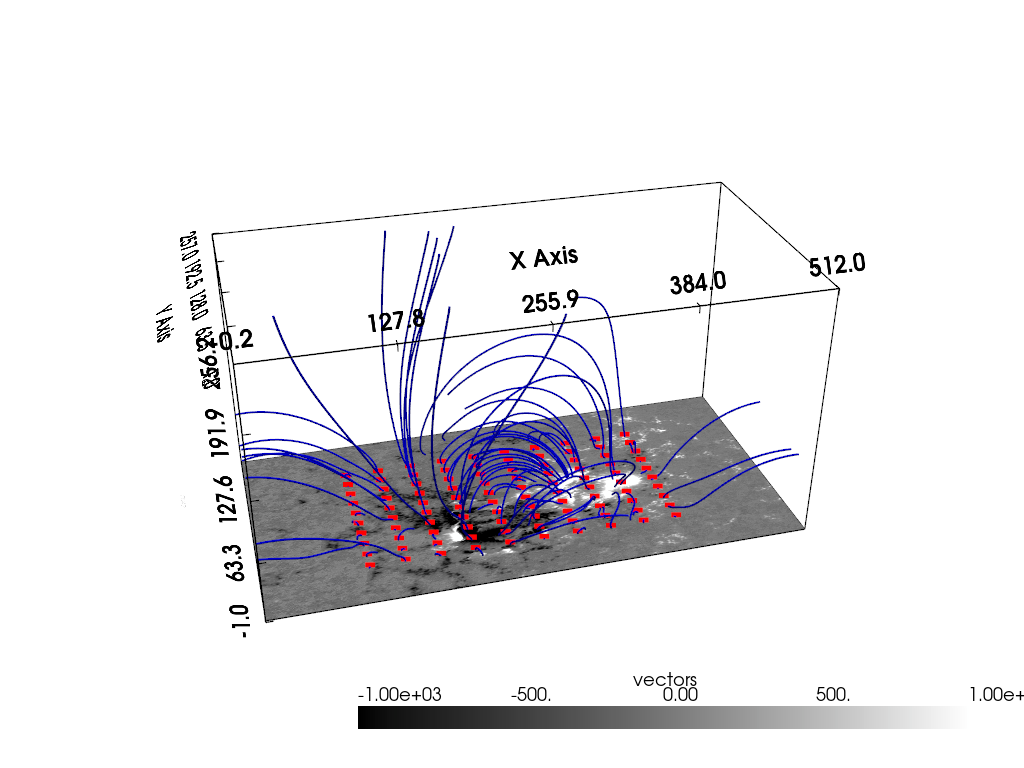

In [ ]:
plotter = CartesianPlotter()
plotter.define_vector_field(b)
plotter.show_bounds()
plotter.plot_outline(color='black')
plotter.plot_boundary(show_scalar_bar=True, clim=(-1000, 1000))
plotter.plot_field_lines(seeds, color='blue', 
                         seeds_config=dict(show_seeds=True, color='red', point_size=10))
plotter.camera.azimuth = 210
plotter.camera.elevation = -5
plotter.camera.zoom(0.9)
plotter.show(jupyter_backend='static')

In [ ]:
dx = x1[1] - x1[0]
dy = y1[1] - y1[0]

x_seed = np.linspace(x1[0]+100*dx, x1[-1]-100*dx, 10)
y_seed = np.linspace(y1[0]+50*dy, y1[-1]-50*dx, 10)
seeds = np.array([[x, y, 0] for x in x_seed for y in y_seed])
seeds.shape

(100, 3)

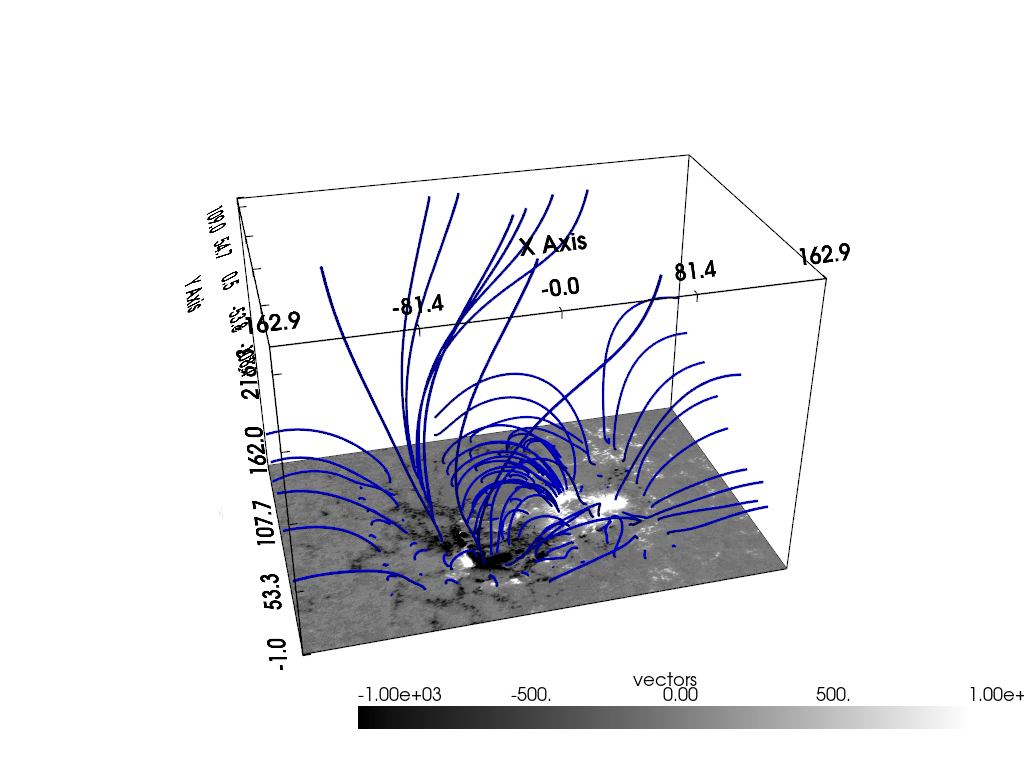

In [ ]:
plotter = CartesianPlotter()
plotter.define_vector_field(b, grid_coords=(x1, y1, z1))
plotter.show_bounds()
plotter.plot_outline(color='black')
plotter.plot_boundary(show_scalar_bar=True, clim=(-1000, 1000))
plotter.plot_field_lines(seeds, color='blue',
                         seeds_config=dict(show_seeds=False))
plotter.camera.azimuth = 210
plotter.camera.elevation = -5
plotter.camera.zoom(0.9)
plotter.show(jupyter_backend='static')